# <span style="color:blue">  Laboratorio 2 - Importance Sampling</span>


In [2]:
import numpy as np
import random
import math
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.optimize import curve_fit

## Exercise 02.1
Programma nella cartella `Ex-2/02.1`.


Nell' esercizio viene calcolato il valore del seguente integrale in 1D , il cui risultatpo è noto analiticamente : 
$$I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx = 1$$

L'integrale è stato calcolato mediante due metodi Montecarlo differenti: 
1. *Campionando una distribuzione uniforme* in [0,1) come una successione di punti $x_i$, tale per cui il valore dell' integrale è: $ I = (1-0) \sum_i\frac{\pi}{2}cos(\frac{\pi x_i}{2})$

2. *Importance Sampling* , estraendo numeri casuali  secondo una distribuzione di probabilità fissata $p(x)$ che permette di campionare più intensamente zone del dominio in cui la funzione è diversa da 0. In linea di principio, sarebbe ottimale scegliere una p(x) che si avvicina il piu possibile all'integranda nell' intervallo selezionato. Siccome l' integranda è monotona crescrente e si annulla in $x = 1$, ho decisio di campionare i dati secondo la funzione:
$$p(x) = 2(1-x)$$ La funzione $p(x)$ inoltre può essere considerata una distribuzione di probabilità nel' intervallo [0,1].Per campionare $p(x)$ è stato utilizzato il metodo dell' inversione della distribuzione comulata: generando $y$, uniformemente distribuito tra [0,1),  il valore di $x$ è quindi dato da : $x = 1 + \sqrt{1-y}$ e di conseguenza il valore dell' integrale è stato calcolato come : 
$$ I = \int_0^1 \frac{\pi}{2}\cos(\pi x/2) dx =\int_0^1 p(x)g(x)dx$$ 
con $g(x) = \frac{\frac{\pi}{2} cos(\pi x/2)}{2(1-x)}$. Dunque il valore dell' integrale è stato stimato a:
$$ I  ≈ \frac{1}{N} \sum_{i = 1}^N g(x_i)$$


Di seguito sono illustrati i grafici che mostrano la stima del valore dell' integrale con le relative incertezze statistiche, in funzione del numero di blocchi $N$ utilizzato.

I programmi sviluppati per risolvere l'esercizio sono contenuti nella cartella `02.1`. All' interno della cartella sono presenti i file `Integral.h` e `FunzioniR1.h`, in cui sono contenute le teciche per il calcolo di un Integrale Mediante Montecarlo, per entrambe le casistiche.

###  1. *Campionamento uniforme in [0,1]*


Per fare il Data-Blocking sono stati utilizzati $N = 100$ blocchi. All' interno di ogni blocco, il valore dell' integrale è stato calcolato 1 sola volta, utilizzando $M = 10^4$ tiri per il calcolo di $I$ all' interno di un blocco.

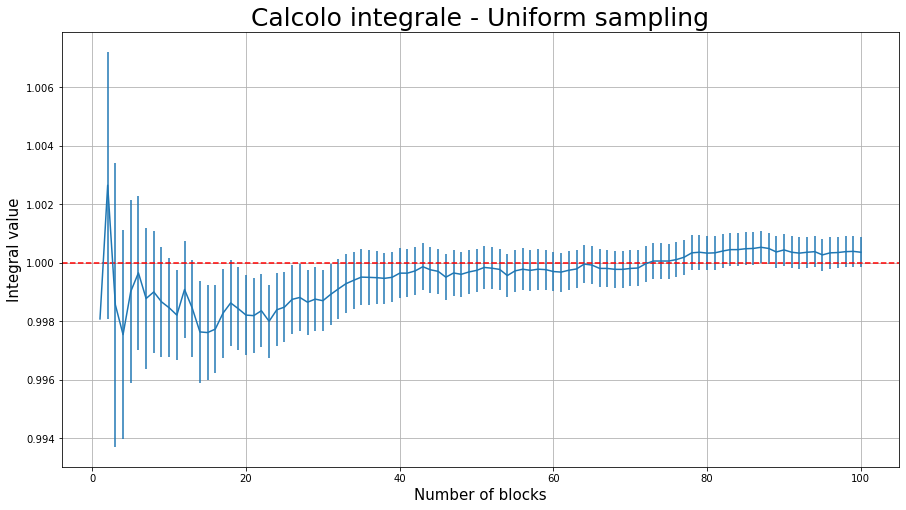

Risultati ottenuti all'ultimo blocco
Valore dell'integrale : 
1.00036

Incertezza : 
0.000516858


In [7]:
#====== Valore Integrale con Campionamento Uniforme =====
x, f,error = np.loadtxt("Ex-2/02.1/Medie.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.figure(figsize=(15,8))
plt.xlabel('Number of blocks', fontsize = 15)
plt.ylabel('Integral value', fontsize = 15)
plt.title("Calcolo integrale - Uniform sampling",fontsize = 25)
plt.grid(True)
plt.errorbar(x,f ,yerr=error)
plt.axhline(y=1, color = 'r', linestyle = 'dashed')

plt.show()

print("Risultati ottenuti all'ultimo blocco")
print("Valore dell'integrale : ")
print(f[-1])
print('\nIncertezza : ')
print(error[-1])

### 2. *Importance Sampling* 

Per fare il Data-Blocking sono stati utilizzati $N = 100$ blocchi. All' interno di ogni blocco, il valore dell' integrale è stato calcolato 1 sola volta, utilizzando $M = 10^4$ tiri per il calcolo di $I$ all' interno di un blocco.

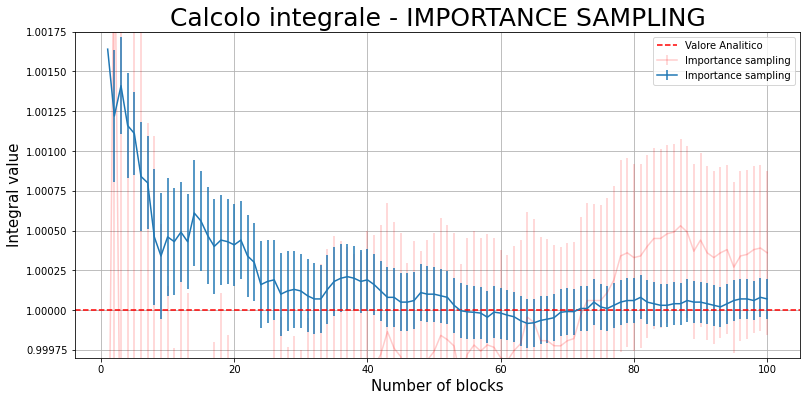

Risultati ottenuti all'ultimo blocco
Valore dell'integrale : 
1.00007

Incertezza : 
0.000123197


In [13]:
#====== Valore Integrale con Importance Sampling =====
x_IS, f_IS,error_IS = np.loadtxt("Ex-2/02.1/Medie_IS.dat", usecols=(0,1,2), delimiter=None, unpack='true')
plt.figure(figsize=(13,6))
plt.xlabel('Number of blocks', fontsize = 15)
plt.ylabel('Integral value', fontsize = 15)
plt.title("Calcolo integrale - IMPORTANCE SAMPLING",fontsize = 25)
plt.grid(True)
plt.ylim(0.99970,1.00175)
plt.errorbar(x,f ,yerr=error,label = 'Importance sampling',color = 'r',alpha = 0.2)
plt.errorbar(x_IS,f_IS ,yerr=error_IS,label = 'Importance sampling')
plt.axhline(y=1, color = 'r', linestyle = 'dashed',label ='Valore Analitico')
plt.legend()

plt.show()

print("Risultati ottenuti all'ultimo blocco")
print("Valore dell'integrale : ")
print(f_IS[-1])
print('\nIncertezza : ')
print(error_IS[-1])

Come atteso, il Metodo dell' *Importance Sampling* è piu veloce nella convergenza al valore analitico e più preciso nella stima.

## Exercise 02.2
Programma nella cartella `Ex-2/02.2`.

 Siulazione di un Random-Walk, che parta dall' origine $\vec{r} = \vec{0}$, dove ogni passo è determinato nel seguente modo: 

1. $Reticolo$ $Cubico$ di passo *a = 1*. A ogni passo, il Walker si muove in avanti o in indietro in una delle tre direzioni del reticolo: $x,y,z$.La risoluzione sarà illustrata nel prossimo paragrafo.
$$$$
2. $Reticolo$ $Continuo$: il walker compie un passo di lunghezza $ a = 1$ in uns direzione casuale estratta campionando uniformemente gli angoli solidi $\theta \in [0,\pi]$ e $\phi \in [0,2\pi]$. La risoluzione sarà illustrata nel prossimo paragrafo.

Per entrambi i casi è stata valutata la distanza cartesiana del passo $n$-esimo dall'origine: 
$$ \vec{r_n} = a \sqrt{x_n^2 + y_n^2 + z_n^2}$$

Sono state eseguiti $10^4$ RWs da $n = 100$ passi ciascuno e è stato studiato l'andamento di $\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW}}$  al variare del numero di Passi $n$.
$$$$
In seguito è stato dimostrato che l'andamento è di tipo diffusivo e segue quindi una legge di potenza del tipo $f(x) = k\sqrt{n}$. 
$$$$
Viene mostrato quindi l' andamento di $\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW} }-k\sqrt{N}$ con il relativo errore.
**Osservazione** : bisogna ricordarsi di fare la propagazione dell'errore, moltiplicando l'errore ottenuto per: 

$$ err(\sqrt{x}) = \frac{1}{2\sqrt{x}}$$

### 1. Random Walk Discreta
`Metodo di Risoluzione`:  
- Estrazione di un numero casuale $c$ compreso tra $[0,2)$ per la definizione della direzione:
    - $0 ≤ c < 1$ --> direzione x
    - $1 ≤ c < 2$ --> direzione y
    - $2 ≤ c < 3$ --> direzione z
- Estrazione di un numero casuale $v$ compreso tra $[0,1)$ per la definizione del verso: 
    - $0 ≤ d < \frac{1}{2}$ --> verso negativo
    - $\frac{1}{2} ≤ d < 1$ --> verso positivo
    
$$$$E' stato adoperato il metodo del Data-Blocking e dunque i $10^4$ RWs sono stati divisi in $N = 100$ blocchi da $100$ RWs ciascuno.
 
Per la risoluzione del programma è stata generata la classe `Posizione_D`, che contiene le informazioni riguardanti la posizione del Random Walk al passo $n-esimo$ e adopera l'update delle posizioni.

Il fitting è stato fatto usando la funzione `curve_fit()` della libreria ` SciPy`.

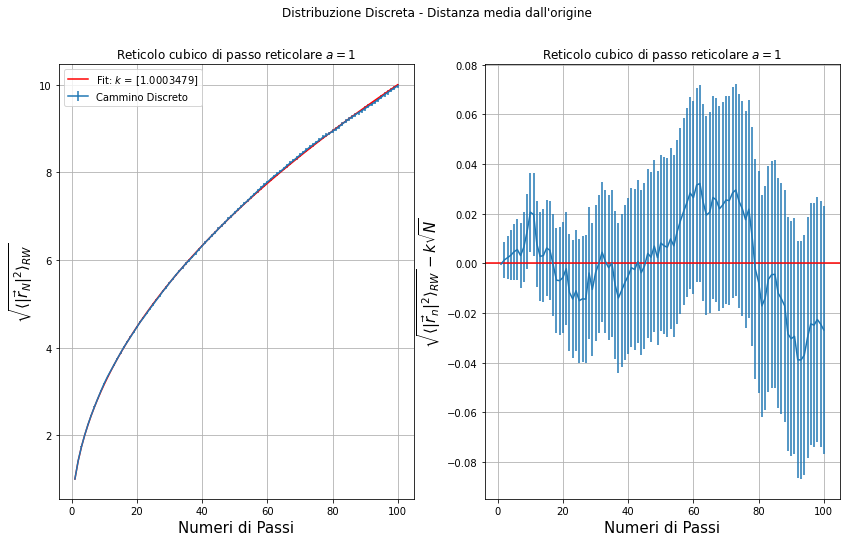

In [10]:
r, err = np.loadtxt("Ex-2/02.2/RW_Discreto.dat", usecols=(0,1), delimiter="  ", unpack='true')
plt.figure(figsize=(14,8))
plt.suptitle("Distribuzione Discreta - Distanza media dall'origine")

#====== Funzione k*sqrt(n)======
def f(x,k):
    return k* np.sqrt(x)
x = np.arange(1,101,1)

#========= Distanza Media =========
plt.subplot(1,2,1)
plt.errorbar(x,r,yerr = err, label= 'Cammino Discreto ')
plt.title(r'Reticolo cubico di passo reticolare $a = 1$')
plt.xlabel('Numeri di Passi',fontsize = 15)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize = 15)
plt.grid()

popt = curve_fit(f,x,r)
#print ("k = "+str(popt))
plt.plot(x,f(x,popt[0]),color = 'r',label = 'Fit: $k$ = '+str(popt[0]))
plt.legend()

#====== Confornto con legge di potenza ========
plt.subplot(1,2,2)
plt.errorbar(x,r-f(x,popt[0]),yerr = err,label='Cammino Discreto')
plt.title(r'Reticolo cubico di passo reticolare $a = 1$')
plt.xlabel(r'Numeri di Passi',fontsize = 15)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW} }-k\sqrt{N}$',fontsize = 15)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid()
plt.show()

Come mi sarei aspettata, il fit avviene per $k = 1$, ricordando  che nel mio caso $a = 1$. I risultati ottenuti sono quindi in accordo con la teoria dei RW secondo la quale:
$$\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW}} = a\sqrt{n}$$ 

Questo dimostra anche che il RW ha effettivamente un comportamento diffusivo.

### 1. Random Walk Continua
`Metodo di Risoluzione`:  
- Estrazione di un numero casuale $\theta$ compreso tra $[0,\pi]$  
- Estrazione di un numero casuale $\phi$ compreso tra $[0,2\pi]$ 
- Spostamento del RW : 
$$\vec{step} = a[sin(\theta)cos(\phi) , sin(\theta)sin(\phi) , cos(\theta)]$$

*Osservazione Importante* : decido di ignorare il fatto che i due poli della sfera possano venire vovracampionati rispetto agli altri punti.  
$$$$E' stato adoperato il metodo del Data-Blocking e dunque i $10^4$ RWs sono stati divisi in $N = 100$ blocchi da $100$ RWs ciascuno.
 
Per la risoluzione del programma è stata generata la classe `Posizione_C`, che contiene le informazioni riguardanti la posizione del Random Walk al passo $n-esimo$ e adopera l'update delle posizioni.

Il fitting è stato fatto usando la funzione `curve_fit()` della libreria ` SciPy`.

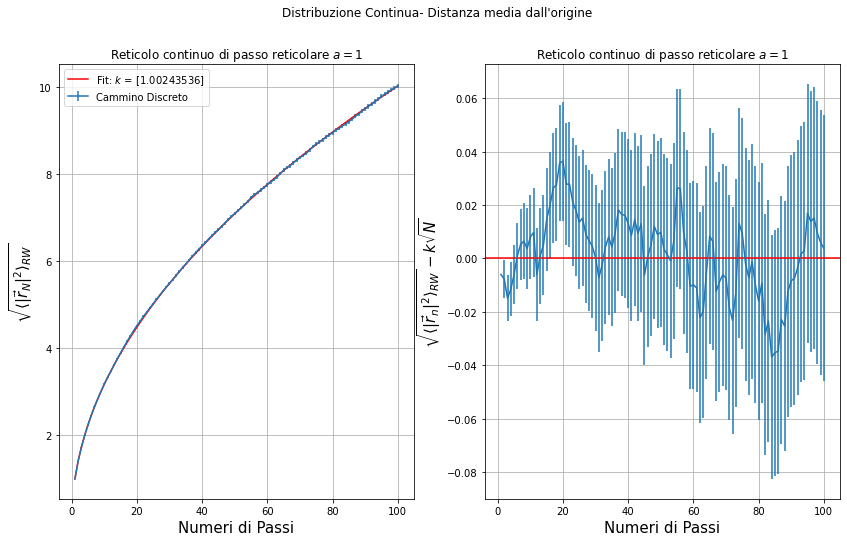

In [11]:
r, err = np.loadtxt("Ex-2/02.2/RW_Continuo.dat", usecols=(0,1), delimiter="  ", unpack='true')
plt.figure(figsize=(14,8))
plt.suptitle("Distribuzione Continua- Distanza media dall'origine")

#====== Funzione k*sqrt(n)======
def f(x,k):
    return k* np.sqrt(x)
x = np.arange(1,101,1)

#========= Distanza Media =========
plt.subplot(1,2,1)
plt.errorbar(x,r,yerr = err, label= 'Cammino Discreto ')
plt.title(r'Reticolo continuo di passo reticolare $a = 1$')
plt.xlabel('Numeri di Passi',fontsize = 15)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_N|^2 \rangle_{RW}}$',fontsize = 15)
plt.grid()

popt = curve_fit(f,x,r)
#print ("k = "+str(popt))
plt.plot(x,f(x,popt[0]),color = 'r',label = 'Fit: $k$ = '+str(popt[0]))
plt.legend()

#====== Confornto con legge di potenza ========
plt.subplot(1,2,2)
plt.errorbar(x,r-f(x,popt[0]),yerr = err,label='Cammino Discreto')
plt.title(r'Reticolo continuo di passo reticolare $a = 1$')
plt.xlabel(r'Numeri di Passi',fontsize = 15)
plt.ylabel(r'$\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW} }-k\sqrt{N}$',fontsize = 15)
plt.axhline(y=0, color = 'r', linestyle = '-')
plt.grid()
plt.show()

Come mi sarei aspettata, il fit avviene per $k = 1$, ricordando  che nel mio caso $a = 1$. I risultati ottenuti sono quindi in accordo con la teoria dei RW secondo la quale:
$$\sqrt{\langle |\vec{r}_n|^2 \rangle_{RW}} = a\sqrt{n}$$ 

Questo dimostra anche che il RW ha effettivamente un comportamento diffusivo.